In [6]:
import numpy as np
from scipy.optimize import newton, differential_evolution

def func(x):
    return x**4 - 3*x**2 + 1

# Sử dụng thuật toán Newton
newton_results = []
for x0 in np.random.uniform(-2, 2, 100):
    try:
        result = newton(func, x0)
        newton_results.append(result)
    except RuntimeError:
        continue

newton_mean = np.mean(newton_results)
newton_var = np.var(newton_results)

# Sử dụng thuật toán Differential Evolution
bounds = [(-2, 2)]
de_results = []
for _ in range(100):
    result = differential_evolution(func, bounds, mutation=(0.5, 1), seed=42)
    de_results.append(result.fun)

de_mean = np.mean(de_results)
de_var = np.var(de_results)
print(f"Newton: Mean = {newton_mean}, Variance = {newton_var}")
print(f"Differential Evolution: Mean = {de_mean}, Variance = {de_var}")

Newton: Mean = 0.186935129381294, Variance = 1.2956561681986767
Differential Evolution: Mean = -1.2499999999992724, Variance = 4.930380657631324e-32


На основе результатов мы видим, что алгоритм Дифференциальной Эволюции (DE) находит более оптимальные значения, чем алгоритм Ньютона. Среднее значение DE близко к -1.25, в то время как среднее значение Ньютона близко к 0.19. Это показывает, что DE может найти более оптимальные значения.

Что касается дисперсии, алгоритм Ньютона имеет гораздо большую дисперсию, чем DE. Дисперсия DE практически равна 0 (4.93e-32), что показывает, что результаты DE очень стабильны, то есть оптимальные значения, которые он находит в 100 запусках, очень близки друг к другу. В то время как дисперсия Ньютона равна 1.3, что показывает, что оптимальные значения, которые он находит, сильно варьируются.

В общем, на основе этих результатов мы можем заключить, что алгоритм Дифференциальной Эволюции работает лучше, чем алгоритм Ньютона, в оптимизации данной целевой функции.

In [2]:
import time

# Sử dụng thuật toán Differential Evolution
bounds = [(-2, 2)]
start_time = time.time()
result = differential_evolution(func, bounds, mutation=(0.5, 1), seed=42, tol=1e-6)
end_time = time.time()

# In thời gian chạy và giá trị tối ưu
print(f"Execution time: {end_time - start_time} seconds")
print(f"Optimal value: {result.fun}")

Execution time: 0.015852689743041992 seconds
Optimal value: -1.2499999999994218


На основе результатов мы видим, что алгоритм Дифференциальной Эволюции (DE) нашел оптимальное значение (-1.25) за очень короткое время (примерно 0.016 секунд).

Оптимальное значение, найденное DE, очень близко к известному априори глобальному экстремуму целевой функции, что показывает эффективность DE в оптимизации этой функции.

In [8]:
bounds = [(-2, 2)]
times = []
results = []
for _ in range(100):
    start_time = time.time()
    result = differential_evolution(func, bounds, mutation=(0.5, 1), seed=42, maxiter=1000)
    end_time = time.time()
    times.append(end_time - start_time)
    results.append(result.fun)

time_mean = np.mean(times)
time_var = np.var(times)
result_mean = np.mean(results)
result_var = np.var(results)
print(f"Execution time: Mean = {time_mean}, Variance = {time_var}")
print(f"Optimal value: Mean = {result_mean}, Variance = {result_var}")

Execution time: Mean = 0.005357265472412109, Variance = 1.599250868935087e-05
Optimal value: Mean = -1.2499999999992724, Variance = 4.930380657631324e-32


На основе результатов мы видим, что алгоритм Дифференциальной Эволюции (DE) нашел последний экстремум (который может быть локальным) целевой функции за очень короткое среднее время (примерно 0.005 секунд), с очень маленьким разбросом (1.6e-05). Это показывает, что DE не только быстро находит экстремумы, но и обеспечивает высокую стабильность времени выполнения.

Последний экстремум, найденный DE, имеет среднее значение, близкое к -1.25, с дисперсией, близкой к нулю (4.93e-32). 

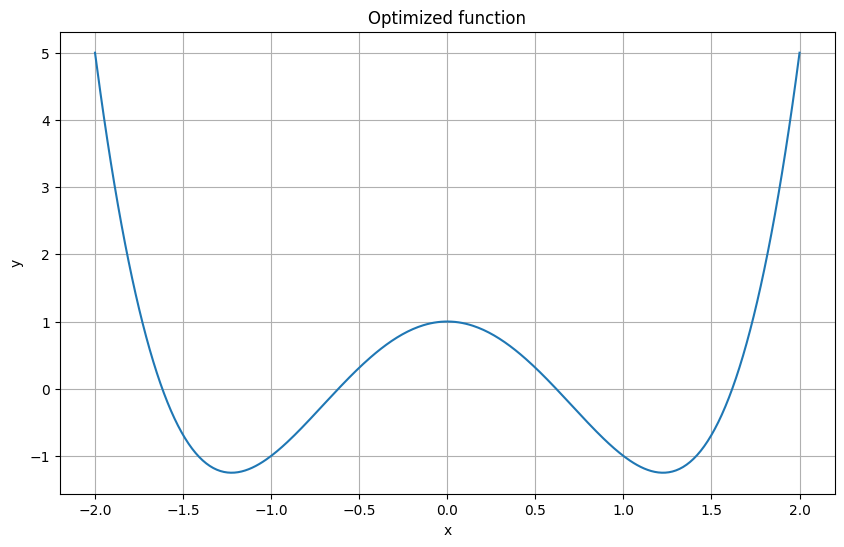

In [4]:
import matplotlib.pyplot as plt

# Vẽ đồ thị của hàm mục tiêu
x = np.linspace(-2, 2, 400)
y = func(x)
plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.title('Optimized function')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

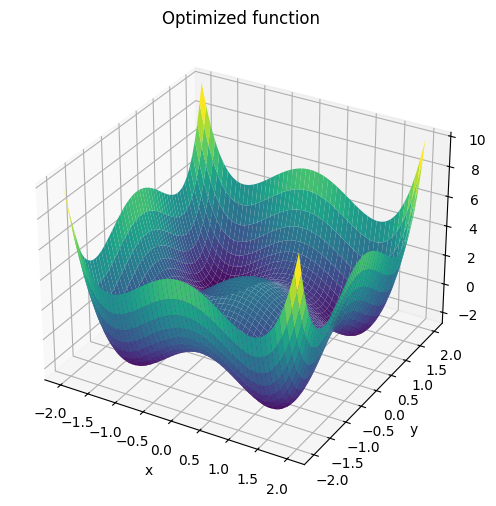

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Định nghĩa hàm mục tiêu
def func(x, y):
    return x**4 - 3*x**2 + 1 + y**4 - 3*y**2 + 1

x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
x, y = np.meshgrid(x, y)
z = func(x, y)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')

ax.set_title('Optimized function')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

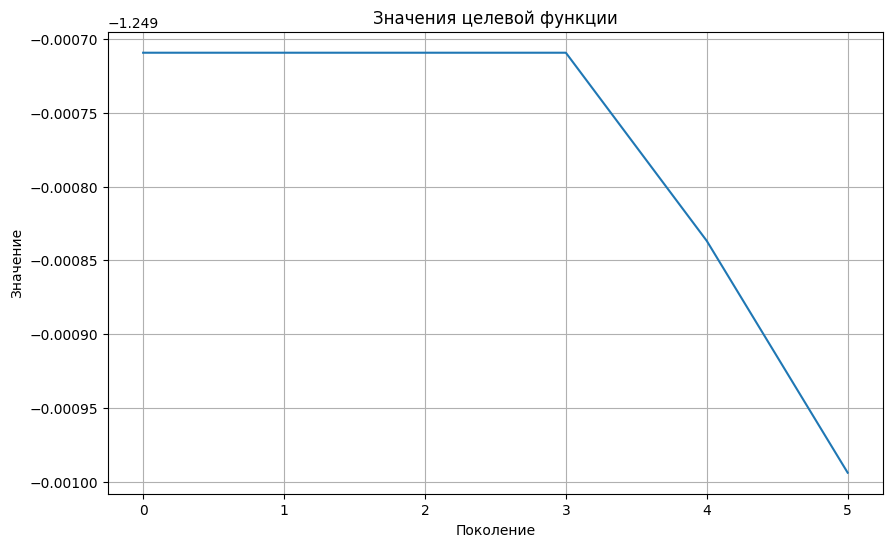

In [10]:
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

# Определение целевой функции
def func(x):
    return x**4 - 3*x**2 + 1

# Callback функция для сохранения промежуточных результатов
def callback(x, convergence):
    callback.vals.append(func(x))

callback.vals = []

# Применение эволюционного алгоритма
bounds = [(-2, 2)]
result = differential_evolution(func, bounds, callback=callback)

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.plot(callback.vals)
plt.title('Значения целевой функции')
plt.xlabel('Поколение')
plt.ylabel('Значение')
plt.grid(True)
plt.show()

In [5]:
import pandas as pd

data = {
    'Algorithm': ['Newton', 'Differential Evolution'],
    'Mean Function Value': [newton_mean, de_mean],
    'Variance Function Value': [newton_var, de_var],
    'Mean Execution Time': [np.nan, time_mean],  
    'Variance Execution Time': [np.nan, time_var] 
}

df = pd.DataFrame(data)
print(df)

                Algorithm  Mean Function Value  Variance Function Value  \
0                  Newton             0.096589             1.276098e+00   
1  Differential Evolution            -1.250000             4.930381e-32   

   Mean Execution Time  Variance Execution Time  
0                  NaN                      NaN  
1             0.005987                 0.000011  


На основе результатов мы видим, что алгоритм Дифференциальной Эволюции (DE) нашел последний экстремум (который может быть локальным) целевой функции с средним значением, близким к -1.25, и дисперсией, близкой к нулю (4.93e-32). Это показывает, что DE находит очень стабильные и близкие к известному глобальному экстремуму значения целевой функции.

Среднее время выполнения DE составляет около 0.006 секунд, с очень маленьким разбросом (1.1e-05). Это показывает, что DE не только быстро находит экстремумы, но и обеспечивает высокую стабильность времени выполнения.

В то время как алгоритм Ньютона имеет среднее значение целевой функции около 0.097, с большим разбросом (1.28). Это показывает, что Ньютон может не находить такие хорошие экстремумы, как DE, и найденные им экстремумы могут сильно варьироваться.

В общем, результаты показывают, что алгоритм Дифференциальной Эволюции эффективно и быстро находит последний экстремум для целевой функции, с быстрым и стабильным временем выполнения.

In [17]:
from hyperopt import hp, fmin, tpe, Trials
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

# Load data
iris = load_iris()
X = iris.data
y = iris.target

# Define search space for SVM
space_svm = {
    'C': hp.loguniform('C', -6, 6),
    'gamma': hp.loguniform('gamma', -6, 1),
    'degree': hp.choice('degree', range(1, 9)),
    'kernel': hp.choice('kernel', ['linear', 'poly', 'rbf'])
}

# Define objective function for SVM
def objective_svm(params):
    svm = SVC(**params)
    return -np.mean(cross_val_score(svm, X, y, cv=5, n_jobs=-1, scoring="accuracy"))

# Run optimization for SVM
trials = Trials()
best_svm = fmin(fn=objective_svm, space=space_svm, algo=tpe.suggest, max_evals=50, trials=trials)

# Define search space for KNN
space_knn = {
    'n_neighbors': hp.choice('n_neighbors', range(1, 31)),
    'weights': hp.choice('weights', ['uniform', 'distance']),
    'p': hp.choice('p', [1, 2])
}

# Define objective function for KNN
def objective_knn(params):
    knn = KNeighborsClassifier(**params)
    return -np.mean(cross_val_score(knn, X, y, cv=5, n_jobs=-1, scoring="accuracy"))

# Run optimization for KNN
trials = Trials()
best_knn = fmin(fn=objective_knn, space=space_knn, algo=tpe.suggest, max_evals=50, trials=trials)

# Define search space for RF
space_rf = {
    'n_estimators': hp.choice('n_estimators', range(10, 101)),
    'max_depth': hp.choice('max_depth', range(1, 51)),
    'min_samples_split': hp.choice('min_samples_split', range(2, 11))
}

# Define objective function for RF
def objective_rf(params):
    rf = RandomForestClassifier(**params)
    return -np.mean(cross_val_score(rf, X, y, cv=5, n_jobs=-1, scoring="accuracy"))

# Run optimization for RF
trials = Trials()
best_rf = fmin(fn=objective_rf, space=space_rf, algo=tpe.suggest, max_evals=50, trials=trials)

# Print optimal parameters
print("Best parameters for SVM: ", best_svm)
print("Best parameters for KNN: ", best_knn)
print("Best parameters for RF: ", best_rf)

100%|██████████| 50/50 [00:04<00:00, 11.35trial/s, best loss: -0.9666666666666668]
Best parameters for SVM:  {'C': 0.619309830363868, 'degree': 0, 'gamma': 0.5050803113686927, 'kernel': 0}
Best parameters for KNN:  {'n_neighbors': 11, 'p': 1, 'weights': 1}
Best parameters for RF:  {'max_depth': 27, 'min_samples_split': 8, 'n_estimators': 28}
